# Introduction to Sentiment Analysis

_R Version_
<br>
Authors: Anneke Dresselhuis,

![Cover Art Image](media/sentiment_analysis_cover_art.png "title")

### Loading and Installing Packages

In [ ]:
# un-comment the packages that need to be installed. Installation may take a while.

#install.packages("RcppParallel")
#install.packages("quanteda")
#install.packages("tidytext")
#install.packages("SentimentAnalysis")
#install.packages("textdata")

In [72]:
install.packages("SentimentAnalysis")


  There is a binary version available but the source version is later:
                  binary source needs_compilation
SentimentAnalysis  1.3-4  1.3-5             FALSE



installing the source package 'SentimentAnalysis'




In [34]:
# these may take a while to load

library(tidytext)
library(readr)
library(tidyverse)
library(RcppParallel)
library(quanteda)
library(janeaustenr)
library(dplyr)
library(tidyr)
library(stringr)

### Prerequisites
1. Introduction to Jupyter
2. Introduction to R

### Learning outcomes
After completing this notebook, you will be able to: <br>
1. Understand and apply the principles of “tidy text” data to clean a textual dataset
2. Perform basic sentiment analysis using ...

### Outline
_To be finalized when notebook is complete_

## What is Sentiment Analysis?

“Sentiment analysis is the practice of applying natural language processing and text analysis techniques to identify and extract subjective information from text” (Hussein, 2018). As this definition alludes, sentiment analysis is a part of natural language processing (NLP) which is a field that exists at the intersection of human language and computation. Because humans are complex, emotional beings, the language we use is often shaped by our affective (emotional) dispositions. Sentiment analysis, sometimes referred to as “opinion mining” is one way that researchers can methodologically understand the emotional intentions that lie in a textual dataset.

> **🔎 **Let’s think critically****
>
>  🟠 At the heart of sentiment analysis is the assumption that language reveals interior, affective states, and that these states can be codified and generalized to broader populations. In her book, [Atlas of AI](https://katecrawford.net/atlas) the artificial intelligence scholar Kate Crawford explores how many assumptions found in contemporary sentiment research (ie, that there are 7 universal emotions, etc) are largely unsubstantiated notions that emerged from mid 20th century research funded by US Department of Defense. Rather than maintaining that emotions can be universally categorized, her work invites researchers to think about how emotional expression is highly contextualized by social and cultural factors and the distinct subject positions of content makers.
>
> 🟠 Consider the research question for your sentiment analysis project. How might the text you are working with be shaped by the distinct communities that have generated it?
>
> 🟠 Are there steps you can take to educate yourself around the unique language uses of your dataset (for example, directly speaking with someone from that group or learning from a qualified expert on the subject)?
>
> 🟠 If you’re interested, you can learn more about data justice in community research in a [guide](https://genderplusresearchcollective.sites.olt.ubc.ca/files/2022/09/2022-Gender-Guide-1.pdf) created by UBC’s Office for Regional and International Community Engagement. 

The rise of [web 2.0](https://en.wikipedia.org/wiki/Web_2.0) has produced prolific volumes of user-generated content (UGC) on the internet, particularly as people engage in a variety of social platforms and forums to share opinions, ideas and express themselves. Maybe you are interested in understanding how people feel about a particular political candidate by examining tweets around election time, or you wonder what people think about a particular bus route on reddit. UGC is often unstructured data, meaning that it isn’t organized in a recognizable way.
<br>

**Structured data** for a microwave product review might look something like this:

|<span style="color: #CC7A00">Pro</span> | <span style="color: #CC7A00">Con</span> | <span style="color: #CC7A00">Neutral</span>
| :---| :----------- | :-- |
| <span style="color: #CC7A00">Interface is visually appealing</span> | <span style="color: #CC7A00">Hard to change the time</span> | <span style="color: #CC7A00">Purchased from store #553</span> |
| <span style="color: #CC7A00">Heats up food perfectly</span> | <span style="color: #CC7A00">Plug cord length is too short</span> | <span style="color: #CC7A00">Product weighed 23lbs</span> |

**Unstructured data** for a microwave product review might look something like this:

> <span style="color: #CC7A00">I bought the WAV0 X5K microwave last week. When i got home I was tryign to set it up and needed to go out and buy an extension cord because the one on the thing was too short. Took me 20 mins to figure out how to change the time, but teh interface was visually appealing. When I finally got working, it heated up my leftover take-out dinner perfectly.<span style="color: #CC7A00">
<br>
    
In the structured data example above, the reviewer defines which parts of the feedback are positive, negative or neutral. In the unstructured example on the other hand, there are many typos and a given sentence might include a positive and a negative review as well as more nuanced contextual information (ie, that the person had to buy an additional product to make the microwave work). While messy, this contextual information often carries valuable insights that can be very useful for researchers.
<br>
The task of sentiment analysis is to make sense of these kinds of nuanced textual data - often for the purpose of understanding people, predicting human behaviour, or even in some cases, manipulating human behaviour.
<br>
    
**Language is complex and always changing.**
<br>
    
In the English language, for example, the word “present” has multiple meanings which could have positive, negative or neutral connotations. Further, a contemporary sentiment lexicon might code the word “miss” as being associated with negative or sad emotional experiences such as longing; if such a lexicon were applied to a 19th century novel which uses the word “miss” to describe single women, then, it might incorrectly associate negative sentiment where it shouldn’t be. While sentiment analysis can be a useful tool, it demands ongoing criticality and reflexivity from a researcher (you!). Throughout your analysis, be sure to continually ask yourself whether a particular sentiment lexicon is appropriate for your project.


## Working with Textual Data

In this workshop we will consider a few basic, frequency-based approaches to performing sentiment analysis. Even while the methods explored here may be simple, they fundamentally underpin the kinds of learning and pattern recognition that more elaborate machine learning (ML) approaches used in technologies that employ voice recognition, face recognition and so on.

Before we can begin analyzing sentiment in a given dataset, we need to clean it to ensure that it’s formatted in a way that will be responsive to the operations we’d like to perform. As has been covered in other COMET notebooks, the tidy data principles are a set of guidelines for cleaning and structuring data that make it easier to work with and compatible with packages from the [tidyverse](https://www.tidyverse.org/). When formatting textual data according to the tidy text format, we want each token (or each meaningful unit of text, be it a sentence, phrase or individual word) to have its own row.

![Tidy Text Example](media/tidy_text_example.png)

You may also be familiar with other formats that text can be stored in. Hicks [(2022)](https://www.stephaniehicks.com/jhustatcomputing2022/posts/2022-10-13-working-with-text-sentiment-analysis/) outlines how textual data can be stored in strings, corpera and document-term matrices:

* **String**: text can, of course, be stored as strings, i.e., character vectors, within R, and often text data is first read into memory in this form. (example: “here is a string of text.”)
* **Corpus**: these types of objects typically contain raw strings annotated with additional metadata and details.
* **Document-term matrix**: This is a sparse matrix describing a collection (i.e., a corpus) of documents with one row for each document and one column for each term. The value in the matrix is typically word count.
<br>

If you have lots of experience with cleaning textual data sets, feel free to skip to the next section - if you’re looking for more practice with this, you’re right where you need to be!
<br>

The following list contains a few things we want to consider when preparing a textual dataset; many of these steps will be automatically taken by sentiment analysis functions:
* **Stop words** are common words that aren’t typically useful in textual analysis because they don’t communicate very much meaning. Some common stop words include: “to”, “the,” and “and.”
<br>

You can look at a pre-defined list of stop words in the tidytext dataset using this command:


In [36]:
head(stop_words)

word,lexicon
<chr>,<chr>
a,SMART
a's,SMART
able,SMART
about,SMART
above,SMART
according,SMART


* **Case matching** is one way we can remove noise in a textual dataset by transforming all characters to lowercase, especially if we don’t want our model to treat capitalized words differently from non-capitalized words.
* **Punctuation removal** is another noise removal strategy. One important thing to consider is how punctuation removal can accidentally remove important meaning or structure to a text. 

Next, we’ll run through a practice example using a predetermined lexicon titled, `bing` which was created by Bing Liu and collaborators. The lexicon contains a list of around 6800 English words which are categorized as being either positive or negative. You can read more about the lexicon [here](https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html). One thing to note about lexicon-based analyses that operate at the word level is that they are not able to understand the sentiment of phrases or pairs of words such as “not bad” or “not true.” Can you think of any other phrases that might not work with a word-based analysis?


In [37]:
# Construct a dataframe
username <- c("@potus", "@abject.ron", "@tess888", "@ayden99", "@curious_reggie", 
                    "@peter.the.third", "@xavier_w", "@humble.pacifist", 
                    "@krz4377", "@not.nat")
policy_text <- c("Today we changed prehistoric policies held our great country back from progress.", 
            "@potus this policy change is an abomination of everything America stands for", 
            "I have completely lost trust in the government", 
            "I am hopeful things will get better after this valuable change", 
            "Navigating the past is always a challenge, but one that can be overcome through hard work.",
            "Can our country recover from this?",
            "@ayden99 - Progress wins. A victory for America today.",
            "Poor call @potus - old rules kept us from making the mistakes of the past...",
            "I'm sick of aristocracy stamping out the people's power",
            "Definitely some mixed feelings about today's decision. Some wins, some losses, but hey - that's democracy.")

policy_df <- tibble(username = username, text=policy_text) |>
group_by(username)

policy_df 

username,text
<chr>,<chr>
@potus,Today we changed prehistoric policies held our great country back from progress.
@abject.ron,@potus this policy change is an abomination of everything America stands for
@tess888,I have completely lost trust in the government
@ayden99,I am hopeful things will get better after this valuable change
@curious_reggie,"Navigating the past is always a challenge, but one that can be overcome through hard work."
@peter.the.third,Can our country recover from this?
@xavier_w,@ayden99 - Progress wins. A victory for America today.
@humble.pacifist,Poor call @potus - old rules kept us from making the mistakes of the past...
@krz4377,I'm sick of aristocracy stamping out the people's power


Once we have a dataframe, we want to convert it into the tidytext format. The `unnest_tokens` function helps us do that and includes arguments which we can use to specify how we want this done. You can learn more about the `unnest_tokens` function by inputing `?unnest_tokens` into a code cell.

In [40]:
policy_token <- policy_df  |>
    unnest_tokens(output = word, 
                  input = text,
                  token = "words", # this specifies that we want a token to be 1 word
                  to_lower = TRUE) # converts all text to uniform lowercase
            
head(policy_token)

username,word
<chr>,<chr>
@potus,today
@potus,we
@potus,changed
@potus,prehistoric
@potus,policies
@potus,held


In the above code, try changing the argument `token = "words"` to `token = "characters"` or `token = "sentences"` <br>
<br>
What do you see? <br>
<br>
If we were interested in running our sentiment analysis at a higher level, for example, by considering sentences as tokens, we could also do that. For the purpose of this analysis, we will be working at the word level; be sure to return the above argument to `token = "words"` when you are ready to continue the analysis.


#### Negative Sentiment
If we are only interested in identifying the words in our corpus of tweets that contain negative (as opposed to positive) sentiment, we can use the `bing` library. Let's take a look at some of the words on the `bing` list:

In [41]:
head(get_sentiments("bing"))

word,sentiment
<chr>,<chr>
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative


In [42]:
negative_sentiments <- get_sentiments("bing") %>% 
    filter(sentiment == "negative") # select only the negative words

negative_policy <- policy_token %>%
    inner_join(negative_sentiments) %>% 
    count(word, sort = TRUE) # count the number of negative words

head(negative_policy)

Joining with `by = join_by(word)`


username,word,n
<chr>,<chr>,<int>
@abject.ron,abomination,1
@curious_reggie,hard,1
@humble.pacifist,mistakes,1
@humble.pacifist,poor,1
@krz4377,sick,1
@not.nat,losses,1


#### Negative and Positive Sentiment

In [84]:
sentiment_policy <- policy_token %>%
    inner_join(get_sentiments("bing")) %>% # adds column with binary sentiment library
    count(word, sentiment) %>%
    pivot_wider(names_from = sentiment, values_from = n, values_fill = 0)
head(sentiment_policy)

Joining with `by = join_by(word)`


username,word,negative,positive
<chr>,<chr>,<int>,<int>
@abject.ron,abomination,1,0
@ayden99,better,0,1
@ayden99,hopeful,0,1
@ayden99,valuable,0,1
@curious_reggie,hard,1,0
@curious_reggie,work,0,1


#### Summarizing Sentence-level Sentiment

In [44]:
summary_policy <- policy_token %>%
    inner_join(get_sentiments("bing")) %>% # adds column with binary sentiment library
    count(username, word, sentiment) %>%
    pivot_wider(names_from = sentiment, values_from = n, values_fill = 0) %>%
    mutate(sentiment = positive - negative)
summary_policy

Joining with `by = join_by(word)`


username,word,negative,positive,sentiment
<chr>,<chr>,<int>,<int>,<int>
@abject.ron,abomination,1,0,-1
@ayden99,better,0,1,1
@ayden99,hopeful,0,1,1
@ayden99,valuable,0,1,1
@curious_reggie,hard,1,0,-1
@curious_reggie,work,0,1,1
@humble.pacifist,mistakes,1,0,-1
@humble.pacifist,poor,1,0,-1
@krz4377,sick,1,0,-1


In [56]:
bing_word_counts <- policy_token |>
  inner_join(get_sentiments("bing")) |>
  count(word, sentiment, sort = TRUE) |>
  ungroup()

bing_word_counts

Joining with `by = join_by(word)`


username,word,sentiment,n
<chr>,<chr>,<chr>,<int>
@abject.ron,abomination,negative,1
@ayden99,better,positive,1
@ayden99,hopeful,positive,1
@ayden99,valuable,positive,1
@curious_reggie,hard,negative,1
@curious_reggie,work,positive,1
@humble.pacifist,mistakes,negative,1
@humble.pacifist,poor,negative,1
@krz4377,sick,negative,1


We can further look at the summed score for a given user's tweet beyond the individual words. <br>
For example, if we ran the code, `with(sentiment_policy2, sum(sentiment[username == "@curious_reggie"]))` we would get a value of `-1` because `(-1) + (-1) + (+1) = -1`
<br>
Try out a few different usernames in the blank `...` code below: 
* "@potus"
* "@abject.ron" 
* "@tess888" 
* "@ayden99" 
* "@curious_reggie" 
* "@peter.the.third"
* "@xavier_w"
* "@humble.pacifist"
* "@krz4377"
* "@not.nat"


In [59]:
user_summary <- summary_policy |>
filter(username == "@curious_reggie")|>
mutate(sentiment_sum = sum(sentiment))|>
select(username, sentiment_sum)|>
distinct()

user_summary

username,sentiment_sum
<chr>,<int>
@curious_reggie,0


## Applied Analysis: Sentimental Analysis of r/UBC

In [61]:
install.packages("RedditExtractoR")

also installing the dependency 'RJSONIO'





  There is a binary version available but the source version is later:
         binary  source needs_compilation
RJSONIO 1.3-1.8 1.3-1.9              TRUE

  Binaries will be installed
package 'RJSONIO' successfully unpacked and MD5 sums checked
package 'RedditExtractoR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\irene\AppData\Local\Temp\RtmpQtPDts\downloaded_packages


In [179]:
install.packages("openair")
library(openair)

also installing the dependencies 'deldir', 'png', 'jpeg', 'interp', 'latticeExtra', 'mapproj'





  There are binary versions available but the source versions are later:
        binary source needs_compilation
deldir   1.0-6  2.0-4              TRUE
interp   1.1-4  1.1-6              TRUE
openair 2.16-0 2.18-2              TRUE

  Binaries will be installed
package 'deldir' successfully unpacked and MD5 sums checked
package 'png' successfully unpacked and MD5 sums checked
package 'jpeg' successfully unpacked and MD5 sums checked
package 'interp' successfully unpacked and MD5 sums checked
package 'latticeExtra' successfully unpacked and MD5 sums checked
package 'mapproj' successfully unpacked and MD5 sums checked
package 'openair' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\irene\AppData\Local\Temp\RtmpQtPDts\downloaded_packages


In [196]:
library(RedditExtractoR)

rubc_urls_workday <- tibble(find_thread_urls(
keywords = "workday",
sort_by = "new",
subreddit = "ubc",
period = "month"
))

rubc_urls_ssc <- tibble(find_thread_urls(
keywords = "ssc",
sort_by = "new",
subreddit = "ubc",
period = "month"
))

parsing URLs on page 1...
parsing URLs on page 2...
parsing URLs on page 3...
parsing URLs on page 1...


In [130]:

install.packages("syuzhet")
library(syuzhet)
library(lubridate)
library(ggplot2)
library(scales)
library(reshape2)
library(dplyr)
library(RColorBrewer)


Warning message:
"package 'syuzhet' is in use and will not be installed"


In [129]:
install.packages("RColorBrewer")

package 'RColorBrewer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\irene\AppData\Local\Temp\RtmpQtPDts\downloaded_packages


In [116]:
dict <- dictionary(list(issues = c("can't i find", "can't find", "problem", "trouble", "can't register", "help", "issue", "issues", "struggling", "can't find", "not working", "won't work", "can't figure out", "how do i", "how do I", "where do I", "where do i"),
                        negativity = c("awful", "frustruated", "isn't helping", "not helpful", "hard", "terrible", "sucks", "boo", "go back to", "confusing", "waste", "fuck", "shit", "hate"),
                        positivity = c("great", "love", "easy", "i like", "fan", "accessible", "good", "intuitive")))

In [142]:
install.packages("wordcloud")
library(wordcloud)


Warning message:
"package 'wordcloud' is in use and will not be installed"
Warning message:
"package 'worldcloud2' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"


ERROR: Error in library(wordcloud2): there is no package called 'wordcloud2'


In [200]:
r_ubc_workday_cleaned <- rubc_urls_workday |>
select(text)|>
as.character()|>
 tokens(remove_numbers = TRUE, remove_punct = TRUE, remove_separators = TRUE, remove_symbols = TRUE)|>
 tokens_select(pattern = stopwords("en"), selection = "remove")

r_ubc_ssc_cleaned <- rubc_urls_ssc |>
select(text)|>
as.character()|>
 tokens(remove_numbers = TRUE, remove_punct = TRUE, remove_separators = TRUE, remove_symbols = TRUE)|>
 tokens_select(pattern = stopwords("en"), selection = "remove")


Warning message in wordcloud(r_ubc_workday_cleaned):
"workday could not be fit on page. It will not be plotted."


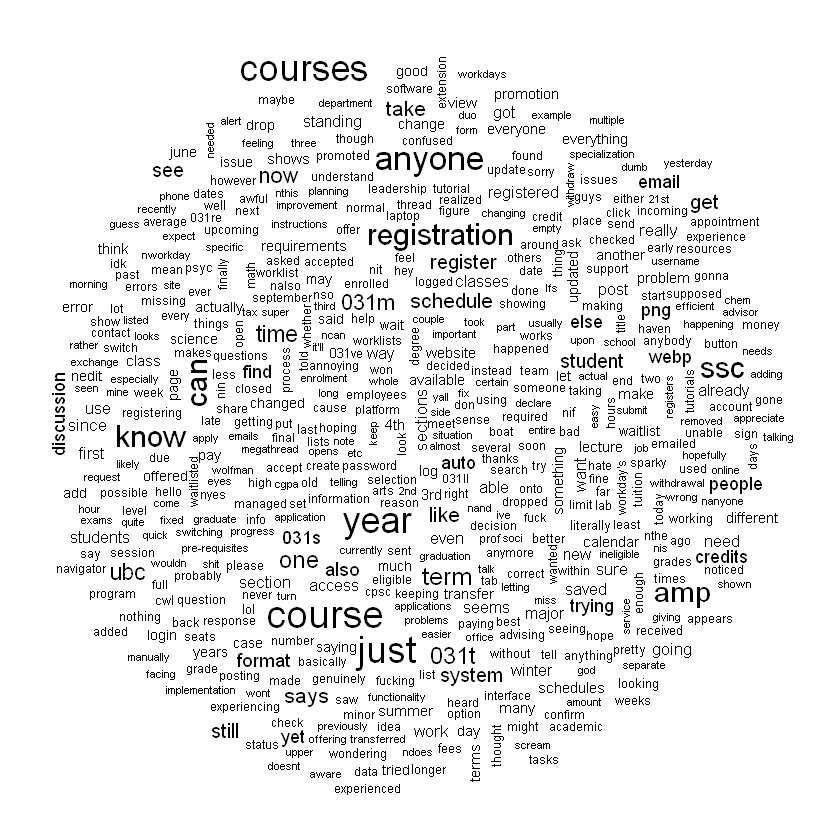

In [202]:
set.seed(100)
wordcloud(r_ubc_workday_cleaned)

In [167]:
positive.words.bl <- scan("media/opinion-lexicon-English/positive-words.txt", what = "char", sep = "\n", skip = 35, quiet = T)
negative.words.bl <- scan("media/opinion-lexicon-English/negative-words.txt", what = "char", sep = "\n", skip = 35, quiet = T)

sentiment.dictionary <- dictionary(list(positive = positive.words.bl, negative = negative.words.bl))
str(sentiment.dictionary)

Formal class 'dictionary2' [package "quanteda"] with 2 slots
  ..@ .Data:List of 2
  .. ..$ :List of 1
  .. .. ..$ : chr [1:2001] "accessable" "accessible" "acclaim" "acclaimed" ...
  .. ..$ :List of 1
  .. .. ..$ : chr [1:4779] "abominable" "abominably" "abominate" "abomination" ...
  ..@ meta :List of 3
  .. ..$ system:List of 5
  .. .. ..$ package-version:Classes 'package_version', 'numeric_version'  hidden list of 1
  .. .. .. ..$ : int [1:3] 3 3 0
  .. .. ..$ r-version      :Classes 'R_system_version', 'package_version', 'numeric_version'  hidden list of 1
  .. .. .. ..$ : int [1:3] 4 1 3
  .. .. ..$ system         : Named chr [1:3] "Windows" "x86-64" "irene"
  .. .. .. ..- attr(*, "names")= chr [1:3] "sysname" "machine" "user"
  .. .. ..$ directory      : chr "c:/econometrics/sentiment_analysis"
  .. .. ..$ created        : Date[1:1], format: "2024-06-14"
  .. ..$ object:List of 2
  .. .. ..$ valuetype: chr "glob"
  .. .. ..$ separator: chr " "
  .. ..$ user  : list()
  ..$ names

In [221]:
dfm_ubc_workday <- dfm(r_ubc_workday_cleaned, dictionary = sentiment.dictionary)
sentiment_ubc_workday <- convert(dfm_ubc_workday, "data.frame") |>
  gather(positive, negative, key = "Polarity", value = "Words")


dfm_ubc_ssc <- dfm(r_ubc_ssc_cleaned, dictionary = sentiment.dictionary)
sentiment_ubc_ssc <- convert(dfm_ubc_ssc, "data.frame") |>
  gather(positive, negative, key = "Polarity", value = "Words")

labels <- c("workday", "workday", "ssc", "ssc")

sentiment_ubc <- tibble(bind_rows(sentiment_ubc_workday, sentiment_ubc_ssc))|>
select(!doc_id)|>
bind_cols(labels)|>
rename(label = ...3)

sentiment_ubc

Warning message:
"'dictionary' and 'thesaurus' are deprecated; use dfm_lookup() instead"
Warning message:
"'dictionary' and 'thesaurus' are deprecated; use dfm_lookup() instead"
New names:
* `` -> `...3`


Polarity,Words,label
<chr>,<dbl>,<chr>
positive,256,workday
negative,288,workday
positive,91,ssc
negative,88,ssc


In [230]:
sentiment_ubc_workday_small <- tibble(sentiment_ubc_workday)|>
select(!doc_id)
sentiment_ubc_workday_small

Polarity,Words
<chr>,<dbl>
positive,256
negative,288


In [234]:
remove.packages("ggplot2")

Removing package from 'C:/Users/irene/anaconda3/envs/comet_env/Lib/R/library'
(as 'lib' is unspecified)



In [235]:
install.packages("ggplot2")2

Warning message:
"package 'ggplot2' is in use and will not be installed"


In [236]:
sentiment_ubc_plot <- ggplot(sentiment_ubc, aes(x=Polarity, y=Words))+geom_bar(stat="identity")
sentiment_ubc_plot

Warning message in draw_axis(break_positions = guide$key[[aesthetic]], break_labels = guide$key$.label, :
"restarting interrupted promise evaluation"
Warning message in draw_axis(break_positions = guide$key[[aesthetic]], break_labels = guide$key$.label, :
"internal error -3 in R_decompress1"
ERROR while rich displaying an object: Error in draw_axis(break_positions = guide$key[[aesthetic]], break_labels = guide$key$.label, : lazy-load database 'C:/Users/irene/anaconda3/envs/comet_env/Lib/R/library/gtable/R/gtable.rdb' is corrupt

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTr

In [223]:
remove.packages("gtable")

Removing package from 'C:/Users/irene/anaconda3/envs/comet_env/Lib/R/library'
(as 'lib' is unspecified)



In [224]:
install.packages("gtable")


  There is a binary version available but the source version is later:
       binary source needs_compilation
gtable  0.3.3  0.3.5             FALSE



installing the source package 'gtable'




In [226]:
sentiment_ubc_plot <- ggplot(sentiment_ubc, aes(x=label, y=Words))+geom_bar(stat="identity")
sentiment_ubc_plot

Warning message in draw_axis(break_positions = guide$key[[aesthetic]], break_labels = guide$key$.label, :
"restarting interrupted promise evaluation"
Warning message in draw_axis(break_positions = guide$key[[aesthetic]], break_labels = guide$key$.label, :
"internal error -3 in R_decompress1"
ERROR while rich displaying an object: Error in draw_axis(break_positions = guide$key[[aesthetic]], break_labels = guide$key$.label, : lazy-load database 'C:/Users/irene/anaconda3/envs/comet_env/Lib/R/library/gtable/R/gtable.rdb' is corrupt

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTr

## References

* Air Force Institute of Technology. (n.d.). Text Mining: Sentiment Analysis · AFIT Data Science Lab R Programming Guide. Retrieved May 31, 2024, from https://afit-r.github.io/sentiment_analysis
* Benoit, K., Watanabe, K., Wang, H., Nulty, P., Obeng, A., Müller, S., & Matsuo, A. (2018). quanteda: An R package for the quantitative analysis of textual data. Journal of Open Source Software, 3(30), 774. https://doi.org/10.21105/joss.00774
* Hicks, S. (2022, October 13). Tidytext and sentiment analysis: Introduction to tidytext and sentiment analysis. https://www.stephaniehicks.com/jhustatcomputing2022/posts/2022-10-13-working-with-text-sentiment-analysis/
* Hussein, D. M. E.-D. M. (2018). A survey on sentiment analysis challenges. Journal of King Saud University - Engineering Sciences, 30(4), 330–338. https://doi.org/10.1016/j.jksues.2016.04.002
* Liu, B. (2011). Sentiment Analysis and Opinion Mining. Department of Computer Science University Of Illinois at Chicago. https://www.cs.uic.edu/~liub/FBS/Sentiment-Analysis-tutorial-AAAI-2011.pdf
* Robinson, D. (2016, July 21). Does sentiment analysis work? A tidy analysis of Yelp reviews. Variance Explained. http://varianceexplained.org/r/yelp-sentiment/
* Silge, J., & Hvitfeldt, E. (2022). Supervised Machine Learning for Text Analysis in R. https://smltar.com/
* Silge, J., & Robinson, D. (2017). Welcome to Text Mining with R | Text Mining with R. https://www.tidytextmining.com/
